In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'
mpl.rcParams['axes.labelweight'] = 'heavy'

In [3]:
url_defence = 'https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats'
url_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats'
url_shooting = 'https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats'

In [4]:
data_defence = pd.read_html(url_defence, header=1)[0]
data_defence = data_defence[data_defence['Player'] != 'Player']
data_defence = data_defence.drop(columns=['Rk', 'Matches'])
data_defence

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,TklW,...,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-037,2000,21.9,50,30,...,83,24,56,16,0,40,36,86,42,0
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-135,1987,22.0,38,29,...,111,16,44,18,1,26,76,114,74,0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-321,2000,19.2,41,25,...,218,53,21,1,0,20,38,79,13,0
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-009,1993,20.3,69,40,...,288,56,30,1,0,29,50,119,9,0
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-304,2000,0.5,0,0,...,11,3,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-008,1999,15.3,36,16,...,102,31,18,7,0,11,21,57,28,0
2839,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-138,1997,14.2,31,22,...,103,59,26,4,0,22,28,59,16,2
2840,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-055,1998,14.5,21,12,...,108,100,7,1,0,6,8,29,7,1
2841,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-264,1990,11.0,3,2,...,37,49,3,2,0,1,2,5,15,0


In [5]:
data_passing = pd.read_html(url_passing, header=1)[0]
data_passing = data_passing[data_passing['Player'] != 'Player']
data_passing = data_passing.drop(columns=['Rk', 'Matches'])
data_passing

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,Att,...,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-037,2000,21.9,733,980,...,157,43.3,1,0.9,+0.1,12,36,28,7,72
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-135,1987,22.0,849,1034,...,199,64.3,0,0.2,-0.2,6,50,4,0,53
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-321,2000,19.2,1152,1248,...,169,86.4,0,0.8,-0.8,8,49,5,0,45
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-009,1993,20.3,836,1020,...,197,68.0,1,1.7,-0.7,14,78,13,6,79
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-304,2000,0.5,2,6,...,0,NaN,0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-008,1999,15.3,616,724,...,120,71.7,1,0.4,+0.6,8,61,6,1,54
2839,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-138,1997,14.2,447,533,...,52,69.2,1,1.0,0.0,12,34,14,2,46
2840,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-055,1998,14.5,616,743,...,110,64.5,4,3.5,+0.5,36,39,27,1,67
2841,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-264,1990,11.0,165,288,...,4,75.0,0,0.6,-0.6,8,12,0,0,12


In [6]:
data_shooting = pd.read_html(url_shooting, header=1)[0]
data_shooting = data_shooting[data_shooting['Player'] != 'Player']
data_shooting = data_shooting.drop(columns=['Rk', 'Matches'])
data_shooting

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-037,2000,21.9,0,9,...,0.00,20.2,0,0,0,0.6,0.6,0.06,-0.6,-0.6
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-135,1987,22.0,1,14,...,0.25,19.1,0,0,0,1.0,1.0,0.07,0.0,0.0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-321,2000,19.2,0,12,...,0.00,18.6,0,0,0,0.6,0.6,0.05,-0.6,-0.6
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-009,1993,20.3,0,19,...,0.00,21.6,0,0,0,1.7,1.7,0.09,-1.7,-1.7
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-304,2000,0.5,0,0,...,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-008,1999,15.3,0,5,...,0.00,17.5,0,0,0,0.4,0.4,0.07,-0.4,-0.4
2839,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-138,1997,14.2,4,32,...,0.29,20.0,0,0,0,2.6,2.6,0.08,+1.4,+1.4
2840,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-055,1998,14.5,4,22,...,0.40,21.0,8,0,0,1.8,1.8,0.08,+2.2,+2.2
2841,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-264,1990,11.0,2,18,...,0.17,9.6,0,1,1,3.2,2.4,0.13,-1.2,-1.4


In [7]:
player_position = pd.read_excel('Player Positions-FBRef format.xlsx')
player_position.drop_duplicates(inplace=True)
set(player_position['Position'])

{'Attacking Midfield',
 'Central Midfield',
 'Centre-Back',
 'Centre-Forward',
 'Defender',
 'Defensive Midfield',
 'Goalkeeper',
 'Left Midfield',
 'Left Winger',
 'Left-Back',
 'Right Midfield',
 'Right Winger',
 'Right-Back',
 'Second Striker',
 'attack',
 'midfield'}

In [8]:
data_defence.iloc[:, 7:] = data_defence.iloc[:, 7:].astype(float)
data_passing.iloc[:, 7:] = data_passing.iloc[:, 7:].astype(float)
data_shooting.iloc[:, 7:] = data_shooting.iloc[:, 7:].astype(float)

In [9]:
data_defence.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2734 entries, 0 to 2842
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Player     2734 non-null   object
 1   Nation     2733 non-null   object
 2   Pos        2734 non-null   object
 3   Squad      2734 non-null   object
 4   Comp       2734 non-null   object
 5   Age        2733 non-null   object
 6   Born       2733 non-null   object
 7   90s        2734 non-null   object
 8   Tkl        2734 non-null   object
 9   TklW       2734 non-null   object
 10  Def 3rd    2734 non-null   object
 11  Mid 3rd    2734 non-null   object
 12  Att 3rd    2734 non-null   object
 13  Tkl.1      2734 non-null   object
 14  Att        2734 non-null   object
 15  Tkl%       2294 non-null   object
 16  Past       2734 non-null   object
 17  Press      2734 non-null   object
 18  Succ       2734 non-null   object
 19  %          2610 non-null   object
 20  Def 3rd.1  2734 non-null   obj

In [10]:
data_shooting = data_shooting.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])
data_passing = data_passing.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])

In [11]:
data = pd.merge(data_defence, data_shooting, on="Player")
data = data.drop_duplicates(subset='Player')
data = pd.merge(data, data_passing, on='Player')
data = data.drop_duplicates(subset='Player')
data

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,TklW,...,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-037,2000,21.9,50.0,30.0,...,157.0,43.3,1.0,0.9,0.1,12.0,36.0,28.0,7.0,72.0
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-135,1987,22.0,38.0,29.0,...,199.0,64.3,0.0,0.2,-0.2,6.0,50.0,4.0,0.0,53.0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-321,2000,19.2,41.0,25.0,...,169.0,86.4,0.0,0.8,-0.8,8.0,49.0,5.0,0.0,45.0
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-009,1993,20.3,69.0,40.0,...,197.0,68.0,1.0,1.7,-0.7,14.0,78.0,13.0,6.0,79.0
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-304,2000,0.5,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-008,1999,15.3,36.0,16.0,...,120.0,71.7,1.0,0.4,0.6,8.0,61.0,6.0,1.0,54.0
2730,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-138,1997,14.2,31.0,22.0,...,52.0,69.2,1.0,1.0,0.0,12.0,34.0,14.0,2.0,46.0
2731,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-055,1998,14.5,21.0,12.0,...,110.0,64.5,4.0,3.5,0.5,36.0,39.0,27.0,1.0,67.0
2732,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-264,1990,11.0,3.0,2.0,...,4.0,75.0,0.0,0.6,-0.6,8.0,12.0,0.0,0.0,12.0


In [12]:
data = pd.merge(player_position, data, on="Player")
data.drop_duplicates(inplace=True)
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,4,Yunis Abdelhamid,Centre-Back,ma MAR,DF,Reims,fr Ligue 1,34-135,1987,22.0,...,199.0,64.3,0.0,0.2,-0.2,6.0,50.0,4.0,0.0,53.0
1,7,Laurent Abergel,Defensive Midfield,fr FRA,MF,Lorient,fr Ligue 1,29-009,1993,20.3,...,197.0,68.0,1.0,1.7,-0.7,14.0,78.0,13.0,6.0,79.0
2,8,Charles Abi,Centre-Forward,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-304,2000,0.5,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,Matthis Abline,Centre-Forward,fr FRA,FW,Rennes,fr Ligue 1,18-319,2003,1.1,...,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,12,Tammy Abraham,Centre-Forward,eng ENG,FW,Roma,it Serie A,24-131,1997,21.6,...,30.0,80.0,3.0,2.7,0.3,23.0,19.0,20.0,2.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,2817,Kurt Zouma,Centre-Back,fr FRA,DF,West Ham,eng Premier League,27-106,1994,12.8,...,101.0,66.3,0.0,0.0,0.0,0.0,9.0,1.0,0.0,19.0
1838,2818,Igor Zubeldia,Defensive Midfield,es ESP,"DF,MF",Real Sociedad,es La Liga,24-317,1997,8.7,...,119.0,78.2,1.0,0.0,1.0,0.0,28.0,1.0,0.0,14.0
1839,2820,Martín Zubimendi,Defensive Midfield,es ESP,MF,Real Sociedad,es La Liga,23-008,1999,15.3,...,120.0,71.7,1.0,0.4,0.6,8.0,61.0,6.0,1.0,54.0
1840,2822,Martin Ødegaard,Attacking Midfield,no NOR,MF,Arsenal,eng Premier League,23-055,1998,14.5,...,110.0,64.5,4.0,3.5,0.5,36.0,39.0,27.0,1.0,67.0


In [13]:
data = data[data['90s']>=5.0]
who = ['Centre-Back', 'Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x : x in who)]
data['TAp90'] = data['Tkl+Int']/data['90s']
data['Clrp90'] = data['Clr']/data['90s']
data['Bp90'] = data['Blocks']/data['90s']
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
0,4,Yunis Abdelhamid,Centre-Back,ma MAR,DF,Reims,fr Ligue 1,34-135,1987,22.0,...,0.2,-0.2,6.0,50.0,4.0,0.0,53.0,5.181818,3.363636,2.0
5,15,Francesco Acerbi,Centre-Back,it ITA,DF,Lazio,it Serie A,34-000,1988,17.1,...,0.2,-0.2,4.0,86.0,4.0,0.0,66.0,2.807018,4.502924,1.754386
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-105,1991,15.6,...,2.2,0.8,28.0,66.0,29.0,16.0,82.0,3.525641,1.346154,1.217949
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-276,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
15,30,Nayef Aguerd,Centre-Back,ma MAR,DF,Rennes,fr Ligue 1,25-317,1996,18.9,...,0.3,0.7,1.0,69.0,2.0,0.0,54.0,2.486772,5.185185,1.058201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2793,Joseba Zaldúa,Right-Back,es ESP,DF,Real Sociedad,es La Liga,29-231,1992,8.6,...,0.4,-0.4,4.0,18.0,10.0,3.0,24.0,3.72093,2.906977,1.976744
1824,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-050,1999,11.0,...,0.9,-0.9,7.0,19.0,6.0,5.0,29.0,3.363636,1.272727,2.0
1828,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-336,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413
1834,2811,Oleksandr Zinchenko,Left-Back,ua UKR,DF,Manchester City,eng Premier League,25-057,1996,5.6,...,0.5,0.5,5.0,48.0,10.0,2.0,38.0,3.928571,1.428571,1.071429


In [14]:
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
0,4,Yunis Abdelhamid,Centre-Back,ma MAR,DF,Reims,fr Ligue 1,34-135,1987,22.0,...,0.2,-0.2,6.0,50.0,4.0,0.0,53.0,5.181818,3.363636,2.0
5,15,Francesco Acerbi,Centre-Back,it ITA,DF,Lazio,it Serie A,34-000,1988,17.1,...,0.2,-0.2,4.0,86.0,4.0,0.0,66.0,2.807018,4.502924,1.754386
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-105,1991,15.6,...,2.2,0.8,28.0,66.0,29.0,16.0,82.0,3.525641,1.346154,1.217949
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-276,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
15,30,Nayef Aguerd,Centre-Back,ma MAR,DF,Rennes,fr Ligue 1,25-317,1996,18.9,...,0.3,0.7,1.0,69.0,2.0,0.0,54.0,2.486772,5.185185,1.058201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2793,Joseba Zaldúa,Right-Back,es ESP,DF,Real Sociedad,es La Liga,29-231,1992,8.6,...,0.4,-0.4,4.0,18.0,10.0,3.0,24.0,3.72093,2.906977,1.976744
1824,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-050,1999,11.0,...,0.9,-0.9,7.0,19.0,6.0,5.0,29.0,3.363636,1.272727,2.0
1828,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-336,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413
1834,2811,Oleksandr Zinchenko,Left-Back,ua UKR,DF,Manchester City,eng Premier League,25-057,1996,5.6,...,0.5,0.5,5.0,48.0,10.0,2.0,38.0,3.928571,1.428571,1.071429


In [15]:
data = data[data['90s']>=5.0]
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x : x in who)]
data['TAp90'] = data['Tkl+Int']/data['90s']
data['Clrp90'] = data['Clr']/data['90s']
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-105,1991,15.6,...,2.2,0.8,28.0,66.0,29.0,16.0,82.0,3.525641,1.346154,1.217949
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-276,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
17,32,Ruben Aguilar,Right-Back,fr FRA,DF,Monaco,fr Ligue 1,28-290,1993,14.8,...,0.4,0.6,7.0,83.0,19.0,5.0,86.0,6.621622,3.310811,1.418919
21,39,Ola Aina,Right-Back,ng NGA,DF,Torino,it Serie A,25-125,1996,11.8,...,1.3,-1.3,13.0,34.0,18.0,5.0,49.0,4.237288,2.033898,1.694915
22,41,Rayan Aït Nouri,Left-Back,fr FRA,DF,Wolves,eng Premier League,20-249,2001,10.0,...,0.9,1.1,8.0,15.0,7.0,4.0,23.0,6.3,1.6,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,2749,Brandon Williams,Left-Back,eng ENG,DF,Norwich City,eng Premier League,21-160,2000,15.6,...,0.6,0.4,11.0,32.0,15.0,3.0,58.0,5.0,1.794872,2.5
1820,2793,Joseba Zaldúa,Right-Back,es ESP,DF,Real Sociedad,es La Liga,29-231,1992,8.6,...,0.4,-0.4,4.0,18.0,10.0,3.0,24.0,3.72093,2.906977,1.976744
1824,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-050,1999,11.0,...,0.9,-0.9,7.0,19.0,6.0,5.0,29.0,3.363636,1.272727,2.0
1828,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-336,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

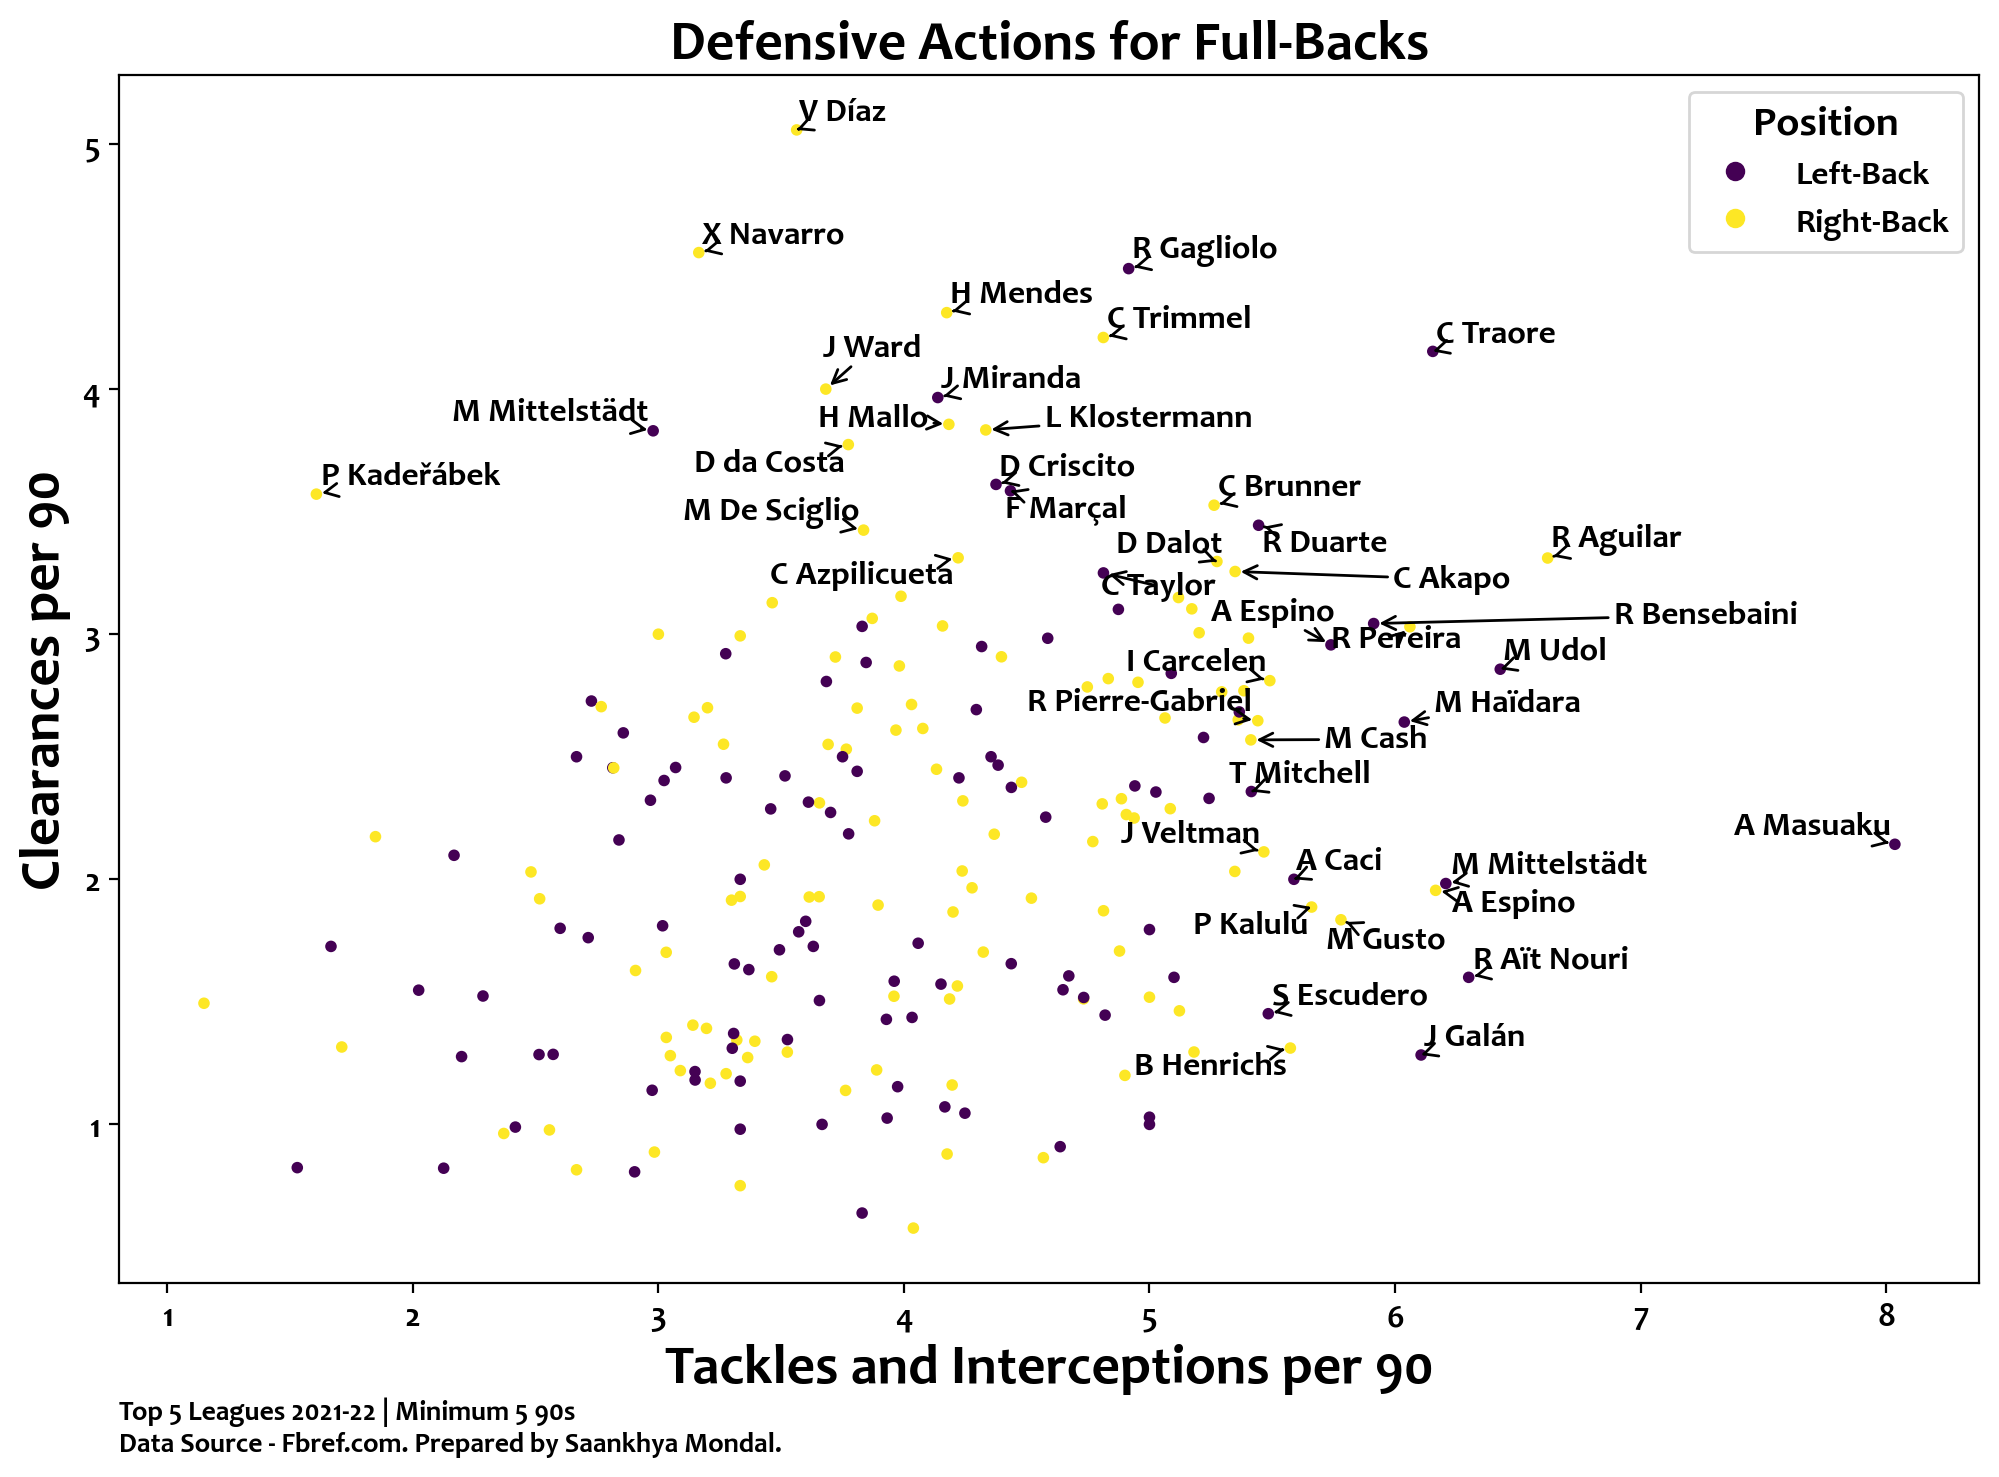

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
par_x = list(data['TAp90'])
par_y = list(data['Clrp90'])
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, c=col_codes, s=10)

outlier_top = data['Clrp90'].astype(float).quantile(0.90)
outlier_bottom = data['Clrp90'].astype(float).quantile(0.02)
outlier_right = data['TAp90'].astype(float).quantile(0.90)
outlier_left = data['TAp90'].astype(float).quantile(0.02)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('Tackles and Interceptions per 90', fontsize=20)
ax.set_ylabel('Clearances per 90', fontsize=20)
ax.set_title('Defensive Actions for Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [17]:
fig.savefig('Images/DefensiveActions_FB.png', dpi=400, bbox_inches='tight')

In [18]:
data = data[data['90s']>=5.0]
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x : x in who)]
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-105,1991,15.6,...,2.2,0.8,28.0,66.0,29.0,16.0,82.0,3.525641,1.346154,1.217949
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-276,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
17,32,Ruben Aguilar,Right-Back,fr FRA,DF,Monaco,fr Ligue 1,28-290,1993,14.8,...,0.4,0.6,7.0,83.0,19.0,5.0,86.0,6.621622,3.310811,1.418919
21,39,Ola Aina,Right-Back,ng NGA,DF,Torino,it Serie A,25-125,1996,11.8,...,1.3,-1.3,13.0,34.0,18.0,5.0,49.0,4.237288,2.033898,1.694915
22,41,Rayan Aït Nouri,Left-Back,fr FRA,DF,Wolves,eng Premier League,20-249,2001,10.0,...,0.9,1.1,8.0,15.0,7.0,4.0,23.0,6.3,1.6,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,2749,Brandon Williams,Left-Back,eng ENG,DF,Norwich City,eng Premier League,21-160,2000,15.6,...,0.6,0.4,11.0,32.0,15.0,3.0,58.0,5.0,1.794872,2.5
1820,2793,Joseba Zaldúa,Right-Back,es ESP,DF,Real Sociedad,es La Liga,29-231,1992,8.6,...,0.4,-0.4,4.0,18.0,10.0,3.0,24.0,3.72093,2.906977,1.976744
1824,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-050,1999,11.0,...,0.9,-0.9,7.0,19.0,6.0,5.0,29.0,3.363636,1.272727,2.0
1828,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-336,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413


In [19]:
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-105,1991,15.6,...,2.2,0.8,28.0,66.0,29.0,16.0,82.0,3.525641,1.346154,1.217949
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-276,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
17,32,Ruben Aguilar,Right-Back,fr FRA,DF,Monaco,fr Ligue 1,28-290,1993,14.8,...,0.4,0.6,7.0,83.0,19.0,5.0,86.0,6.621622,3.310811,1.418919
21,39,Ola Aina,Right-Back,ng NGA,DF,Torino,it Serie A,25-125,1996,11.8,...,1.3,-1.3,13.0,34.0,18.0,5.0,49.0,4.237288,2.033898,1.694915
22,41,Rayan Aït Nouri,Left-Back,fr FRA,DF,Wolves,eng Premier League,20-249,2001,10.0,...,0.9,1.1,8.0,15.0,7.0,4.0,23.0,6.3,1.6,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,2749,Brandon Williams,Left-Back,eng ENG,DF,Norwich City,eng Premier League,21-160,2000,15.6,...,0.6,0.4,11.0,32.0,15.0,3.0,58.0,5.0,1.794872,2.5
1820,2793,Joseba Zaldúa,Right-Back,es ESP,DF,Real Sociedad,es La Liga,29-231,1992,8.6,...,0.4,-0.4,4.0,18.0,10.0,3.0,24.0,3.72093,2.906977,1.976744
1824,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-050,1999,11.0,...,0.9,-0.9,7.0,19.0,6.0,5.0,29.0,3.363636,1.272727,2.0
1828,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-336,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 7 to 1834
Data columns (total 75 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   S. No.     224 non-null    int64 
 1   Player     224 non-null    object
 2   Position   224 non-null    object
 3   Nation     224 non-null    object
 4   Pos        224 non-null    object
 5   Squad      224 non-null    object
 6   Comp       224 non-null    object
 7   Age        224 non-null    object
 8   Born       224 non-null    object
 9   90s        224 non-null    object
 10  Tkl        224 non-null    object
 11  TklW       224 non-null    object
 12  Def 3rd    224 non-null    object
 13  Mid 3rd    224 non-null    object
 14  Att 3rd    224 non-null    object
 15  Tkl.1      224 non-null    object
 16  Att_x      224 non-null    object
 17  Tkl%       224 non-null    object
 18  Past       224 non-null    object
 19  Press      224 non-null    object
 20  Succ       224 non-null    obje

In [21]:
new_data = data[['Player', '90s', 'Tkl', 'TklW', 'Past', 'Press', 'Succ', 'Blocks', 'Int', 'Clr', 'Gls', 'Sh_y', 'SoT', 'xG', 'PrgDist', 'Ast', 'xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog']]
new_data.iloc[:, 2:] = new_data.iloc[:, 2:].div(new_data['90s'], axis=0)
new_data.drop(columns=['90s'], inplace=True)
new_data = new_data.drop_duplicates(subset='Player')
new_data

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,Player,Tkl,TklW,Past,Press,Succ,Blocks,Int,Clr,Gls,...,SoT,xG,PrgDist,Ast,xA,KP,1/3,PPA,CrsPA,Prog
7,Marcos Acuña,2.115385,1.282051,0.384615,9.74359,3.141026,1.217949,1.410256,1.346154,0.064103,...,0.25641,0.083333,472.948718,0.192308,0.141026,1.794872,4.230769,1.858974,1.025641,5.25641
12,Martin Agirregabiria,2.345679,1.17284,1.049383,11.790123,3.209877,1.666667,1.419753,2.530864,0.0,...,0.0,0.006173,305.061728,0.061728,0.055556,0.802469,2.592593,1.111111,0.617284,3.148148
17,Ruben Aguilar,4.121622,2.364865,1.283784,16.891892,6.013514,1.418919,2.5,3.310811,0.0,...,0.067568,0.006757,416.081081,0.067568,0.027027,0.472973,5.608108,1.283784,0.337838,5.810811
21,Ola Aina,1.949153,1.016949,0.59322,10.59322,3.898305,1.694915,2.288136,2.033898,0.0,...,0.169492,0.025424,255.59322,0.0,0.110169,1.101695,2.881356,1.525424,0.423729,4.152542
22,Rayan Aït Nouri,4.4,2.5,1.1,22.6,7.4,1.8,1.9,1.6,0.0,...,0.2,0.03,232.5,0.2,0.09,0.8,1.5,0.7,0.4,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,Brandon Williams,2.371795,1.217949,1.410256,13.525641,3.782051,2.5,2.628205,1.794872,0.0,...,0.0,0.00641,255.320513,0.064103,0.038462,0.705128,2.051282,0.961538,0.192308,3.717949
1820,Joseba Zaldúa,2.55814,1.627907,0.581395,11.395349,2.674419,1.976744,1.162791,2.906977,0.0,...,0.116279,0.0,292.209302,0.0,0.046512,0.465116,2.093023,1.162791,0.348837,2.790698
1824,Gabriele Zappa,1.272727,0.727273,0.909091,17.818182,4.545455,2.0,2.090909,1.272727,0.0,...,0.181818,0.036364,303.636364,0.0,0.081818,0.636364,1.727273,0.545455,0.454545,2.636364
1828,Deyovaisio Zeefuik,1.904762,1.111111,0.793651,14.761905,4.444444,2.698413,1.904762,2.698413,0.0,...,0.0,0.0,169.206349,0.0,0.063492,0.634921,1.111111,0.793651,0.15873,3.174603


In [22]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [23]:
x = new_data.iloc[:, 1:].astype(float)

In [24]:
x = np.array(x)
x = (x - np.mean(x, axis=0))/np.std(x, axis=0)

In [25]:
n_cluster = 2
kmeans = KMeans(n_clusters=n_cluster, max_iter=2000).fit(x)
y = kmeans.labels_
y

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1])

In [26]:
tsne = TSNE(n_components=2, verbose=1, n_iter=5000)
z = tsne.fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 224 samples in 0.000s...
[t-SNE] Computed neighbors for 224 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 224 / 224
[t-SNE] Mean sigma: 1.724036
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.076340
[t-SNE] KL divergence after 1400 iterations: 0.908815


In [27]:
data = pd.DataFrame()
data['Player'] = new_data['Player']
data['y'] = y
data["Component-1"] = z[:,0]
data["Component-2"] = z[:,1]

In [28]:
data

,Player,y,Component-1,Component-2
7,Marcos Acuña,1,6.978661,-6.948830
12,Martin Agirregabiria,0,-1.023063,0.166767
17,Ruben Aguilar,0,7.460331,-0.057990
21,Ola Aina,0,0.439657,-2.651175
22,Rayan Aït Nouri,0,-13.155910,0.828693
...,...,...,...,...
1792,Brandon Williams,0,-5.638682,-1.819250
1820,Joseba Zaldúa,0,-0.671130,0.668032
1824,Gabriele Zappa,0,-4.722109,2.520197
1828,Deyovaisio Zeefuik,0,-5.863874,-3.213972


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

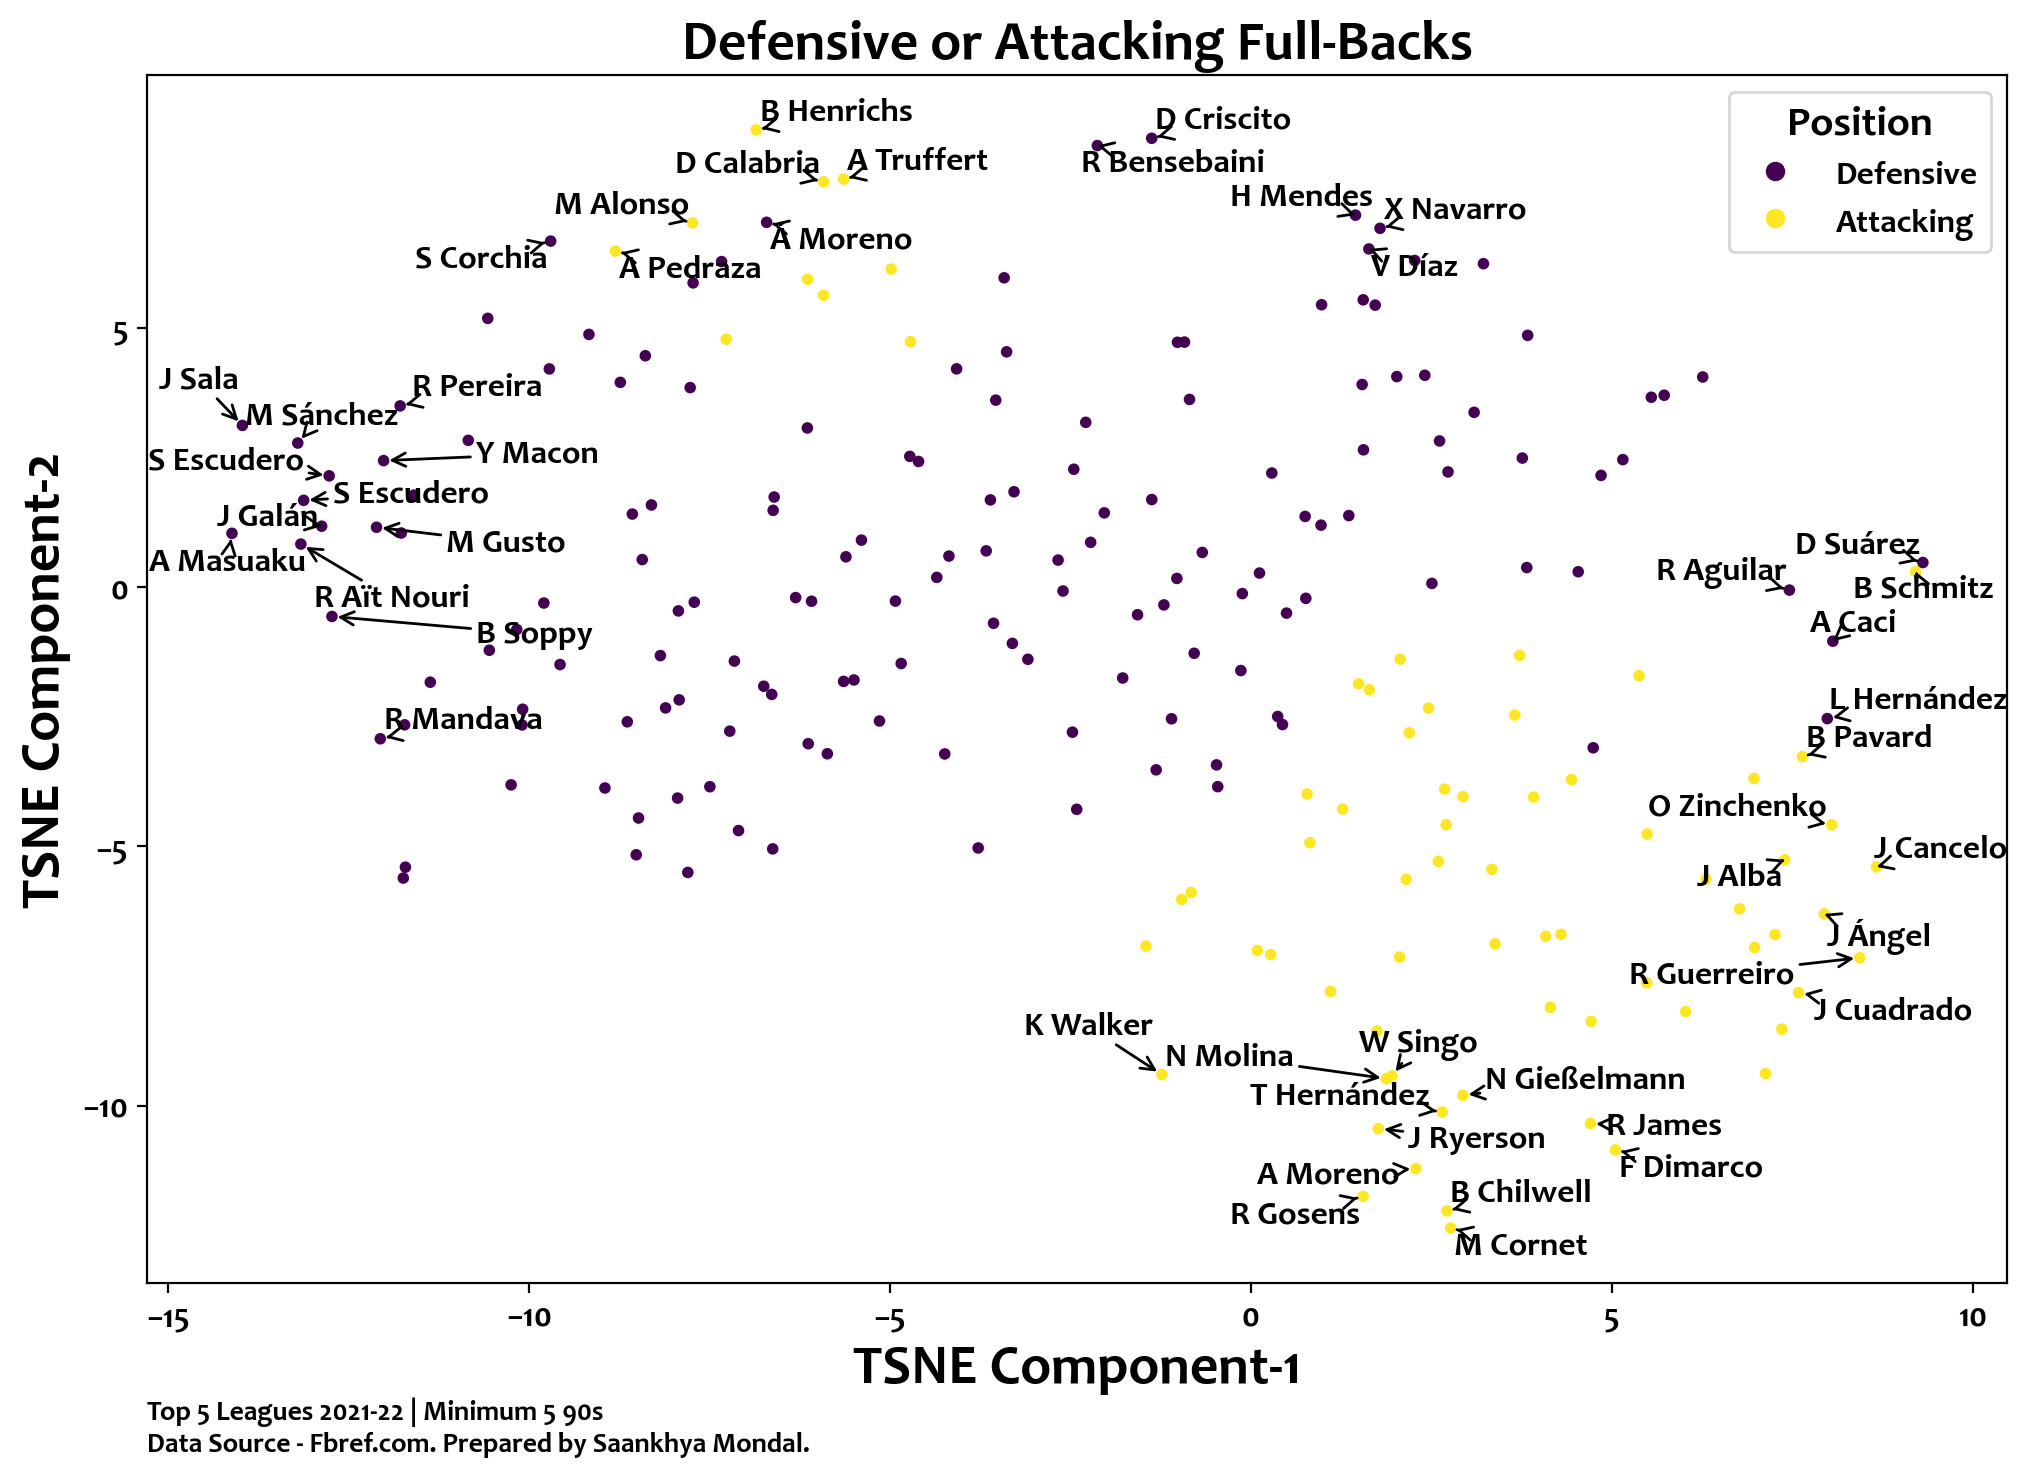

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
par_x = list(data['Component-1'])
par_y = list(data['Component-2'])
col_codes = data.y.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, c=col_codes, s=10)

outlier_top = data['Component-2'].astype(float).quantile(0.95)
outlier_bottom = data['Component-2'].astype(float).quantile(0.05)
outlier_right = data['Component-1'].astype(float).quantile(0.95)
outlier_left = data['Component-1'].astype(float).quantile(0.05)


txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_x[i]<outlier_left or par_y[i]>outlier_top or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('TSNE Component-1', fontsize=20)
ax.set_ylabel('TSNE Component-2', fontsize=20)
ax.set_title('Defensive or Attacking Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=['Defensive', 'Attacking'], title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [30]:
fig.savefig('Images/TSNE-Viz-K-Means-Cluster_FB.png', dpi=400, bbox_inches='tight')